<a href="https://colab.research.google.com/github/fedhere/DSPSsolutions/blob/master/MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy
from astropy.constants import G

from IPython.display import Latex



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measeured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expext that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic ruled for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original targer.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [0]:
# deleate 
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv", skiprows=2, names=["r",'v','dv','err'])


In [0]:

m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [0]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distnce will give you the uncertainty in the size
   
 

In [0]:
#delete 
apparentSizeM31 = 3.167 #deg
distanceM31 = (778, 33) # kpc 


In [0]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [0]:
#delete
m31Dist = distanceM31[0] * u.kpc
m31DistErr = distanceM31[1] * u.kpc

In [0]:
#delete
m31Size = m31Dist * m31angS.to(u.rad)  
m31SizeError = m31DistErr * m31angS.to(u.rad) 
print("Size of the visible component of Andromeda: " + 
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError  ))#, m31SizeError

Size of the visible component of Andromeda: 43 kpc rad +/- 1.8 kpc rad


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometri: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [0]:
m31[m31.r > m31Size].r.values[0]

49.222

We expect the velocity to decrese as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. taks as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the vaulue of the radius and its uncertainty and the velocity and its uncertainty

In [0]:
#delete
# first measurement including all mass
def getradii(gal, gsize, n):
    i = gal[gal.r > n * gsize].r.index[0]
    # first measurement twice as far
    r = gal.iloc[i:i+1]
    return r
  
m31Rds = (getradii(m31, m31Size, 1),  
          getradii(m31, m31Size, 2),  
          getradii(m31, m31Size, 3))
m31Rds

(         r        v       dv     err
 34  49.222  237.069  109.381  23.924,           r        v       dv     err
 38  102.068  213.002  132.456  29.321,           r        v      dv     err
 40  146.977  177.521  81.762  16.662)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indivates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

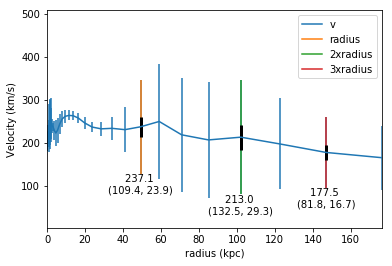

In [0]:
#delete leave plot
def plotGal(gal, rds):
    ax = gal.plot(x='r', y='v', yerr='dv')
    ax = rds[0].plot(x='r', y='v', yerr='dv', ax=ax, 
                                 label="radius")
    ax = rds[1].plot(x='r', y='v', yerr='dv', ax=ax, 
                                  label="2xradius")
    ax = rds[2].plot(x='r', y='v', yerr='dv', ax=ax, 
                                  label="3xradius")
    ax = rds[0].plot(x='r', y='v', yerr='err', ax=ax, 
                                  lw=3, c="k", legend=False)
    ax = rds[1].plot(x='r', y='v', yerr='err', ax=ax, 
                                  lw=3, c="k", legend=False)
    ax = rds[2].plot(x='r', y='v', yerr='err', ax=ax, 
                                   lw=3, c="k", legend=False)
    ax.set_ylabel("Velocity (km/s)")
    ax.set_xlabel("radius (kpc)")
    ax.text(rds[0].r, rds[0].v - rds[0].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[0][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.text(rds[1].r, rds[1].v - rds[1].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[1][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.text(rds[2].r, rds[2].v - rds[2].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[2][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.set_xlim(0, rds[2].r.values[0] * 1.2);
plotGal(m31, m31Rds)

Write a functions that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities velocities at N=1 and N=N (input) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 3-$\sigma$ upper and lower limits of the calculated ratio
     - wheather the expected ratio is within the $3-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  insteada of ```dv```

In [0]:
#delete
def vratios(gal, rds, rd, err='dv'):
    print("\n\n using {} as uncertainty".format(err))
    rin, rout = rds[0], rds[rd]
    vratio = rin["v"].values[0] / rout["v"].values[0]
    dv =  vratio * np.sqrt(
        (rin[err].values[0] /
            rin["v"].values[0])**2 + 
        (rin[err].values[0] /
            rin["v"].values[0])**2)
    print("expected ratio of velocities {:.2f}".format(rout.r.values[0] / rin.r.values[0]))
    print(r"ratio of velocities {:.2f} +/- {:.2f}".format(
          vratio, dv))
    print(r"measurement upper bound (3-sigma) {:.2f}".format(
          vratio + dv * 3))
    print(r"measurement lower bound (3-sigma) {:.2f}".format(
          max(0, vratio - dv * 3)))
    print("rations are the same at 3-sigma significance: {}".format((round(vratio + dv * 3, 2) >= 
                                           round(rout.r.values[0] / rin.r.values[0])) and (round(vratio - dv * 3, 2) <= 
                                           round(rout.r.values[0] / rin.r.values[0]))))
    #print(vratio + 3*dv, G / kpc2m / r1 / (G / kpc2m / r2))

In [0]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')



 using dv as uncertainty
expected ratio of velocities 2.07
ratio of velocities 1.11 +/- 0.73
measurement upper bound (3-sigma) 3.29
measurement lower bound (3-sigma) 0.00
rations are the same at 3-sigma significance: True


 using err as uncertainty
expected ratio of velocities 2.07
ratio of velocities 1.11 +/- 0.16
measurement upper bound (3-sigma) 1.59
measurement lower bound (3-sigma) 0.64
rations are the same at 3-sigma significance: False


In [0]:
vratios(m31, m31Rds, 2)



 using dv as uncertainty
expected ratio of velocities 2.99
ratio of velocities 1.34 +/- 0.87
measurement upper bound (3-sigma) 3.95
measurement lower bound (3-sigma) 0.00
rations are the same at 3-sigma significance: True


In [0]:
vratios(m31, m31Rds, 2, err='err')



 using err as uncertainty
expected ratio of velocities 2.99
ratio of velocities 1.34 +/- 0.19
measurement upper bound (3-sigma) 1.91
measurement lower bound (3-sigma) 0.76
rations are the same at 3-sigma significance: False


### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [0]:
#delete all below

In [0]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/uncertainties/HW4/m31.csv", 
                 skiprows=2, names=["r",'v','dv','err'])
mw.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [0]:
mw.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


https://en.wikipedia.org/wiki/Milky_Way
    

In [0]:
mwSize =  53.5 * u.kpc
mwSizeError = 2.5 * u.kpc
print(mwSize)#, m31SizeError

53.5 kpc


In [0]:
mwRds = (getradii(mw, mwSize, 1), getradii(mw, mwSize, 2), getradii(mw, mwSize, 3))
mwRds

(         r        v       dv     err
 35  59.067  249.443  134.552  26.447,           r        v       dv     err
 39  122.481  197.383  105.727  23.358,           r        v      dv     err
 41  176.373  165.325  74.652  15.706)

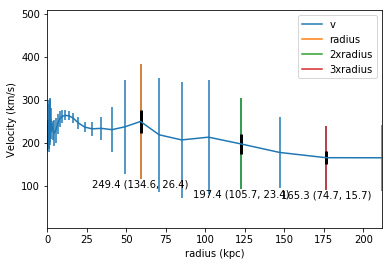

In [0]:
plotGal(mw, mwRds)

In [0]:
vratios(mw, mwRds, 1)
print ()
vratios(mw, mwRds, 2)
print()
vratios(mw, mwRds, 1, "err")
print ()
vratios(mw, mwRds, 2, "err")



 using dv as uncertainty
expected ratio of velocities 2.07
ratio of velocities 1.26 +/- 0.96
measurement upper bound (3-sigma) 4.16
measurement lower bound (3-sigma) 0.00
rations are the same at 3-sigma significance: True



 using dv as uncertainty
expected ratio of velocities 2.99
ratio of velocities 1.51 +/- 1.15
measurement upper bound (3-sigma) 4.96
measurement lower bound (3-sigma) 0.00
rations are the same at 3-sigma significance: True



 using err as uncertainty
expected ratio of velocities 2.07
ratio of velocities 1.26 +/- 0.19
measurement upper bound (3-sigma) 1.83
measurement lower bound (3-sigma) 0.70
rations are the same at 3-sigma significance: False



 using err as uncertainty
expected ratio of velocities 2.99
ratio of velocities 1.51 +/- 0.23
measurement upper bound (3-sigma) 2.19
measurement lower bound (3-sigma) 0.83
rations are the same at 3-sigma significance: False


# Monte Carlo

## M31

In [0]:
## M31
N = int(1e3)
ind1 = m31[m31.r > m31Size].index[0] 
ind2 = m31[m31.r > 2 * m31Size].index[0] 

r1, r2 = m31.loc[ind1].v, m31.loc[ind2].v
dv1, dv2 = m31.loc[ind1].dv, m31.loc[ind2].dv
err1, err2 = m31.loc[ind1].err, m31.loc[ind2].err
mcratios = np.zeros(N)
rins = np.zeros(N)
routs = np.zeros(N)
r1, r2 

(237.06900000000002, 213.002)

In [0]:
#set the seed for reproducibility! 
np.random.seed(622)
for i in range(N):
    rins[i], routs[i] = np.random.randn(2) * (dv1, dv2) + (r1, r2)
    #print(rin, rout, r1, err1, r2, err2, rin / rout)
    mcratios[i] = routs[i] / rins[i]

(array([  1.,   6.,  35., 112., 241., 293., 194.,  95.,  19.,   4.]),
 array([-210.8186347 , -127.69403359,  -44.56943248,   38.55516863,
         121.67976973,  204.80437084,  287.92897195,  371.05357306,
         454.17817416,  537.30277527,  620.42737638]),
 <a list of 10 Patch objects>)

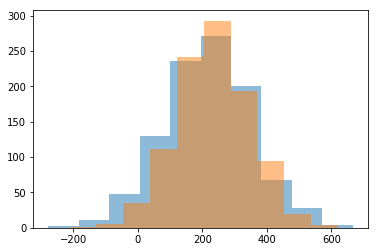

In [0]:
pl.hist(routs, alpha=0.5)
pl.hist(rins, alpha=0.5)

In [0]:
ys, bins = pl.histogram(mcratios, bins=10000)
xs = bins[:-1] + np.diff(bins)
#ys, bins

In [0]:
#check the input distributions
rins.mean(), rins.std(), routs.mean(), routs.std()

(234.9594777334219, 112.33729864998188, 216.65169934258506, 134.91285938968073)

In [0]:
#check the resulting distribution
mcratios.mean(), np.median(mcratios), mcratios.std()

(-2.732507475351509, 0.8906683909513293, 115.86136946732162)

In [0]:
#remember what the original distributions were
vratios(m31, m31Rds, 1)

ratio of velocities 1.11 +/- 0.86
expected ratio 2.07
measurement upper bound (3-sigma) 3.70
2-sigma significance True


## Discuss
Obviously the shape is not gaussian, so taking the standard deviation won't give us the right answer. Thus dustrubtuuin has long tails, but what would be the standard deviaion of the gaussian that fits it?

In [0]:
import scipy as sp
from scipy.optimize import curve_fit
#uncomment below if you want to find out how to fit a gaussian
#curve_fit?

In [0]:
def gauss(x, m, s, A):
    return A * np.exp(-(x-m)**2 / 2 / s**2)

In [0]:
p0 = (1.1, 0.8, N/10)
popt, pcurve = curve_fit(gauss, xs, ys, p0)

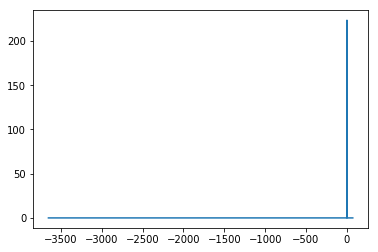

In [0]:
pl.plot(xs, gauss(xs, *popt))

In [0]:
print("mean {:.2f} and standard deviaion {:.2f}".format(popt[0], popt[1]))

mean 1.00 and standard deviaion 0.58
